# Ejercicio. Agrupación aglomerativa y Kmeans con dataset de pingüinos

In [45]:
# importar librerías
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import pandas as pd


In [18]:

# cargar el conjunto de datos de pingüinos
penguins = sns.load_dataset("penguins") 
penguins
# eliminar filas con datos faltantes
penguins = penguins.dropna()
# borrar filas que no contienen datos numéricos
penguins_clean = penguins.drop(columns=['sex', 'island'])
data = penguins_clean[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]
# añadir species al conjunto de datos limpio
penguins_clean['species'] = penguins['species']
penguins_clean


,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,39.1,18.7,181.0,3750.0
1,Adelie,39.5,17.4,186.0,3800.0
2,Adelie,40.3,18.0,195.0,3250.0
4,Adelie,36.7,19.3,193.0,3450.0
5,Adelie,39.3,20.6,190.0,3650.0
...,...,...,...,...,...
338,Gentoo,47.2,13.7,214.0,4925.0
340,Gentoo,46.8,14.3,215.0,4850.0
341,Gentoo,50.4,15.7,222.0,5750.0
342,Gentoo,45.2,14.8,212.0,5200.0


In [19]:
# Obtener las etiquetas de las especies como códigos numéricos
labels = penguins_clean['species'].astype('category').cat.codes
labels

0      0
1      0
2      0
4      0
5      0
      ..
338    2
340    2
341    2
342    2
343    2
Length: 333, dtype: int8

In [14]:
# Normalizar los datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
data_scaled

array([[-0.89604189,  0.7807321 , -1.42675157, -0.56847478],
       [-0.82278787,  0.11958397, -1.06947358, -0.50628618],
       [-0.67627982,  0.42472926, -0.42637319, -1.1903608 ],
       ...,
       [ 1.17338426, -0.74499437,  1.50292796,  1.91906927],
       [ 0.22108196, -1.20271231,  0.78837197,  1.23499466],
       [ 1.08181673, -0.54156417,  0.85982757,  1.48374906]])

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

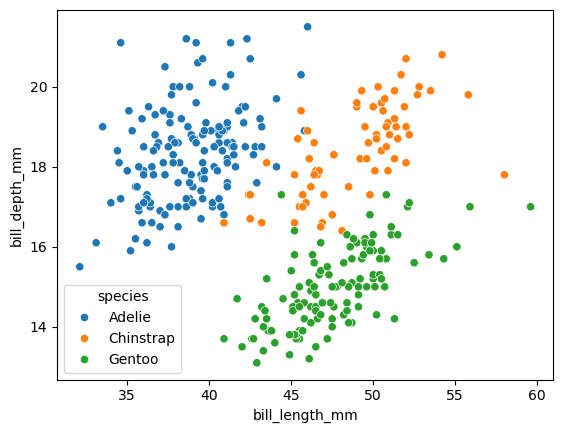

In [ ]:
# Visualizar los datos originales (vemos solo dos características para facilitar la visualización)
sns.scatterplot(x=data['bill_length_mm'], y=data['bill_depth_mm'], hue=penguins_clean['species'])


## Agrupación aglomerativa

In [35]:
# Aplicar algoritmo aglomerativo
from sklearn.cluster import AgglomerativeClustering
agglo = AgglomerativeClustering(n_clusters=3)
agglo.fit(data_scaled)

AgglomerativeClustering(n_clusters=3)

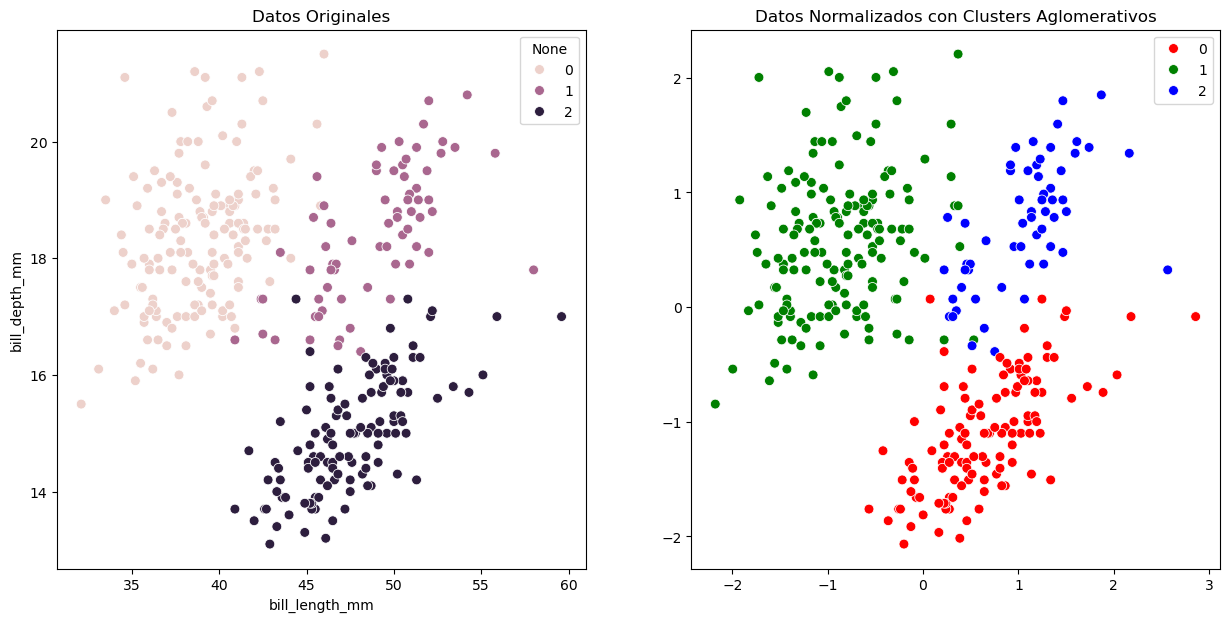

In [42]:
# Comparar datos originales con los normalizados
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

# Datos originales
sns.scatterplot(x=data['bill_length_mm'], y=data['bill_depth_mm'], hue=labels, ax=axes[0], s=50)
# Datos normalizados cambiando colores de puntos según clusters aglomerativos
my_colors = {0:'red', 1:'green', 2:'blue'}
sns.scatterplot(x=data_scaled[:, 0], y=data_scaled[:, 1], hue=agglo.labels_, ax=axes[1], s=50, palette=my_colors)
axes[0].set_title('Datos Originales')
axes[1].set_title('Datos Normalizados con Clusters Aglomerativos')
plt.show()

In [49]:
# queremos ver que columna es la que influye más en la formación de los clusters con datos originales
d = pd.DataFrame(data, columns=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'])
# Ver el que tenga mayor valor absoluto en cada cluster
for cluster in range(3):
    cluster_data = d[agglo.labels_ == cluster]
    mean_values = cluster_data.abs().mean()
    influential_feature = mean_values.idxmax()
    print(f'Cluster {cluster}: La característica que más influye es {influential_feature} con un valor medio de {mean_values[influential_feature]:.4f}')

Cluster 0: La característica que más influye es body_mass_g con un valor medio de 5092.4370
Cluster 1: La característica que más influye es body_mass_g con un valor medio de 3680.0955
Cluster 2: La característica que más influye es body_mass_g con un valor medio de 3810.0877


In [50]:
# Lo mismo con datos normalizados
d = pd.DataFrame(data_scaled, columns=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'])
# Ver el que tenga mayor valor absoluto en cada cluster
for cluster in range(3):
    cluster_data = d[agglo.labels_ == cluster]
    mean_values = cluster_data.abs().mean()
    influential_feature = mean_values.idxmax()
    print(f'Cluster {cluster}: La característica que más influye es {influential_feature} con un valor medio de {mean_values[influential_feature]:.4f}')

Cluster 0: La característica que más influye es flipper_length_mm con un valor medio de 1.1625
Cluster 1: La característica que más influye es bill_length_mm con un valor medio de 0.9153
Cluster 2: La característica que más influye es bill_length_mm con un valor medio de 1.0548


Se ve que es necesario normalizar los datos, porque viendo la tabla original el peso es el que hay una mayor diferencia (tiene más peso). Que en realidad no es real, por eso es necesario normalizar los datos.

## Kmeans

In [52]:
# Aplicación de Kmeans con datos originales
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
kmeans.fit(data)

# Aplicación con datos normalizados
kmeans_scaled = KMeans(n_clusters=3, n_init=10, random_state=42)
kmeans_scaled.fit(data_scaled)

c:\Users\ddiaz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\ddiaz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=3, n_init=10, random_state=42)

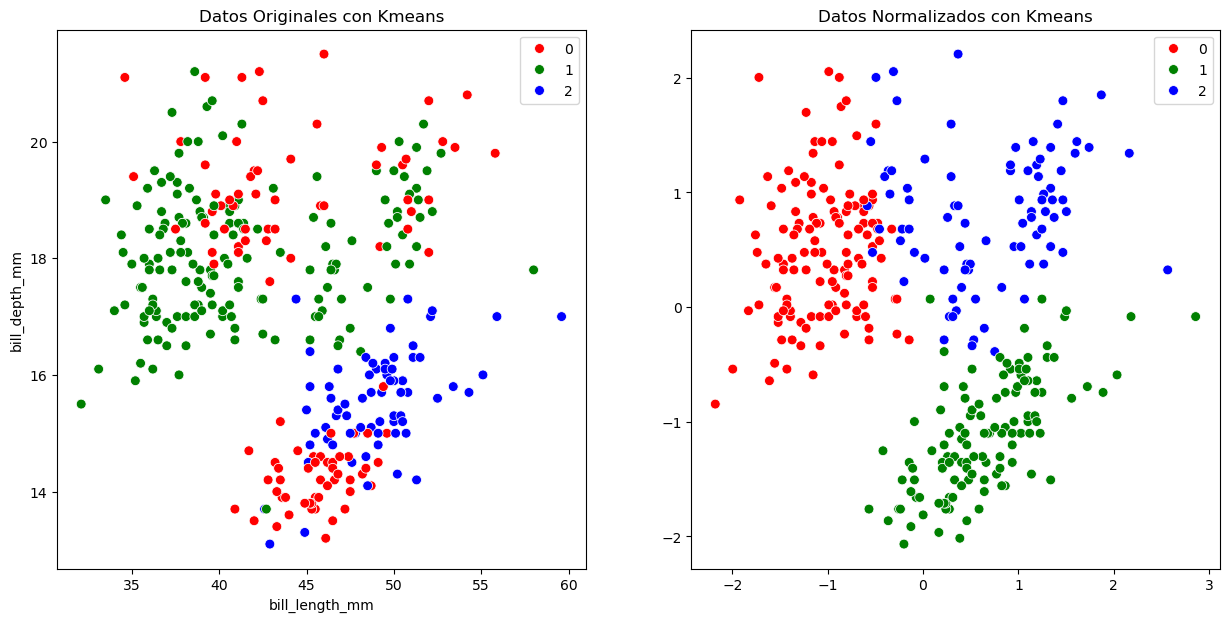

In [56]:
# Visualizamos datos originales y normlalizados con Kmeans
fig, axes = plt.subplots(1, 2, figsize=(15, 7))
# Datos originales
sns.scatterplot(x=data['bill_length_mm'], y=data['bill_depth_mm'], hue=kmeans.labels_, ax=axes[0], s=50, palette=my_colors)
# Datos normalizados
sns.scatterplot(x=data_scaled[:, 0], y=data_scaled[:, 1], hue=kmeans_scaled.labels_, ax=axes[1], s=50, palette=my_colors)
axes[0].set_title('Datos Originales con Kmeans')
axes[1].set_title('Datos Normalizados con Kmeans')
plt.show()

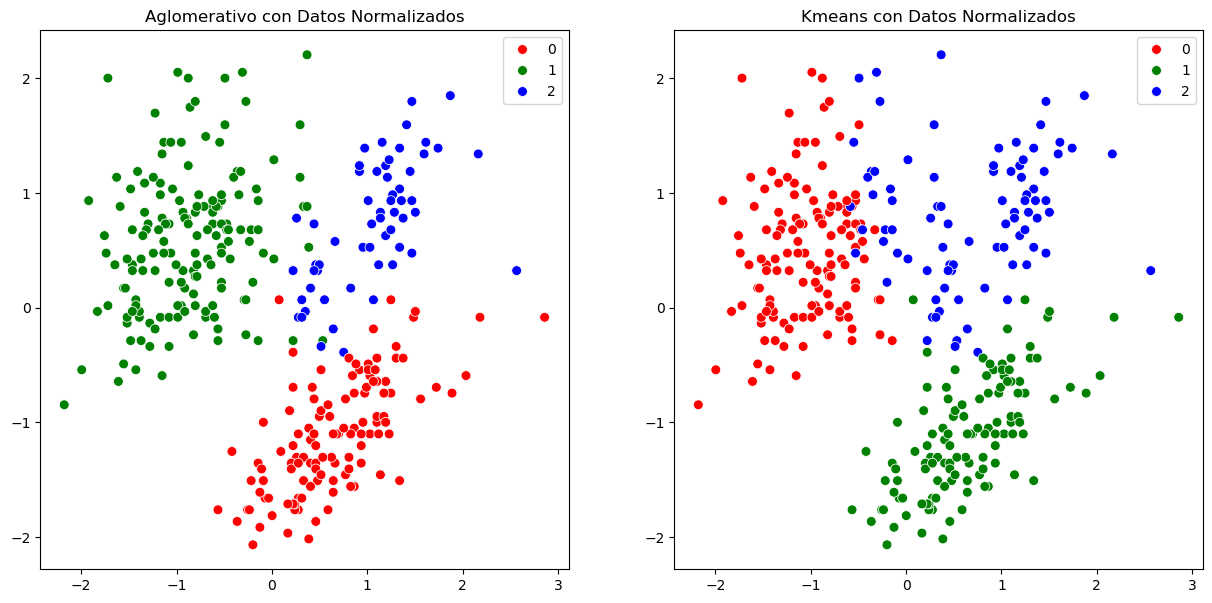

In [57]:
# Comparamos los resultados de Kmeans y Aglomerativo con datos normalizados
fig, axes = plt.subplots(1, 2, figsize=(15, 7))
# Aglomerativo
sns.scatterplot(x=data_scaled[:, 0], y=data_scaled[:, 1], hue=agglo.labels_, ax=axes[0], s=50, palette=my_colors)
# Kmeans
sns.scatterplot(x=data_scaled[:, 0], y=data_scaled[:, 1], hue=kmeans_scaled.labels_, ax=axes[1], s=50, palette=my_colors)
axes[0].set_title('Aglomerativo con Datos Normalizados')
axes[1].set_title('Kmeans con Datos Normalizados')
plt.show()